In [1]:
import numpy as np
import scipy as sp
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
def rndm(a, b, g, size=1):
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

E0 = 10**15
E1 = 10**18
gamma = -2.5
N= 10000

E = rndm(E0, E1, gamma, N) 
A = 10**12
B = 1.2

def S_ref(A,B,E):
    return (E/A)**(1/B)

S_i_ref=S_ref(A,B,E)
cos_2 = np.random.rand(N)

def S_i(alpha, beta, delta, cos, f):
    cos_ref=np.cos(38*np.pi/180.)**2
    x = cos-cos_ref
    return f*(1+beta*x+delta*x**2)

a=0.919
b=1.13
c=1


S=S_i(c,a,b,cos_2,S_i_ref)

In [27]:
data = pd.DataFrame()
data['E'] = E
data['S_ref'] = S_i_ref
data['cos2'] = cos_2
data['S'] = S
data['th'] = np.arccos(np.sqrt(data.cos2))
data['lgE'] = np.log10(data.E)
data['lgS'] = np.log10(data.S)
data['lgS_ref'] = np.log10(data.S_ref)
print(type(data.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [34]:
temp = []
for index in data.index:
    temp.append(data.loc[data['S']>data['S'][index]].count().S)

#data['I'] = temp

data['I'] = data.apply(lambda temp: data.loc[data.S> temp['S']].count().S)

print(data['I'])
#data.loc[data.S>500].count()

KeyError: ('S', 'occurred at index E')

AttributeError: 'DataFrame' object has no attribute 'I'

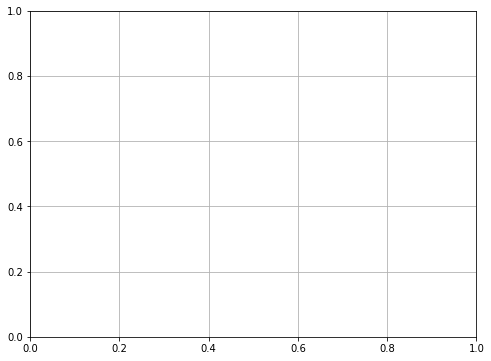

In [5]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
bins=np.linspace(15, 17, 20)


ax2.plot(data.lgS, data.I, lw=0, marker='o')
ax2.set_yscale('log')

plt.show()

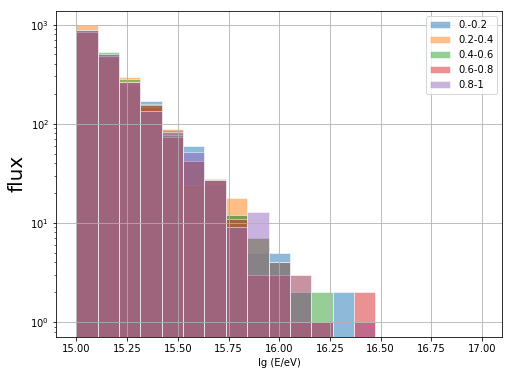

In [6]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
bins=np.linspace(15, 17, 20)

sel_data = data.loc[data.cos2>0.]
sel_data = sel_data.loc[sel_data.cos2<0.2]
ax2.hist(sel_data.lgE,bins = bins, normed = False, alpha=0.5,label="0.-0.2", ec='white')

sel_data = data.loc[data.cos2>0.2]
sel_data = sel_data.loc[sel_data.cos2<0.4]
#n4, bins5, patches = ax2.hist(data.lgE,bins = 100, normed = False, label="Histogram", ec='white')
ax2.hist(sel_data.lgE,bins = bins, normed = False, alpha=0.5,label="0.2-0.4", ec='white')


sel_data= data.loc[data.cos2>0.4]
sel_data=sel_data.loc[sel_data.cos2<0.6]
ax2.hist(sel_data.lgE,bins = bins, normed = False, alpha=0.5,label="0.4-0.6", ec='white')

sel_data = data.loc[data.cos2>0.6]
sel_data = sel_data.loc[sel_data.cos2<0.8]
ax2.hist(sel_data.lgE,bins = bins, normed = False, alpha=0.5,label="0.6-0.8", ec='white')


sel_data = data.loc[data.cos2>0.8]
sel_data = sel_data.loc[sel_data.cos2<1.]
ax2.hist(sel_data.lgE,bins = bins, normed = False, alpha=0.5,label="0.8-1", ec='white')

ax2.set_xlabel("lg (E/eV)")
ax2.set_ylabel("flux", fontsize=20)
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.legend()
plt.show()

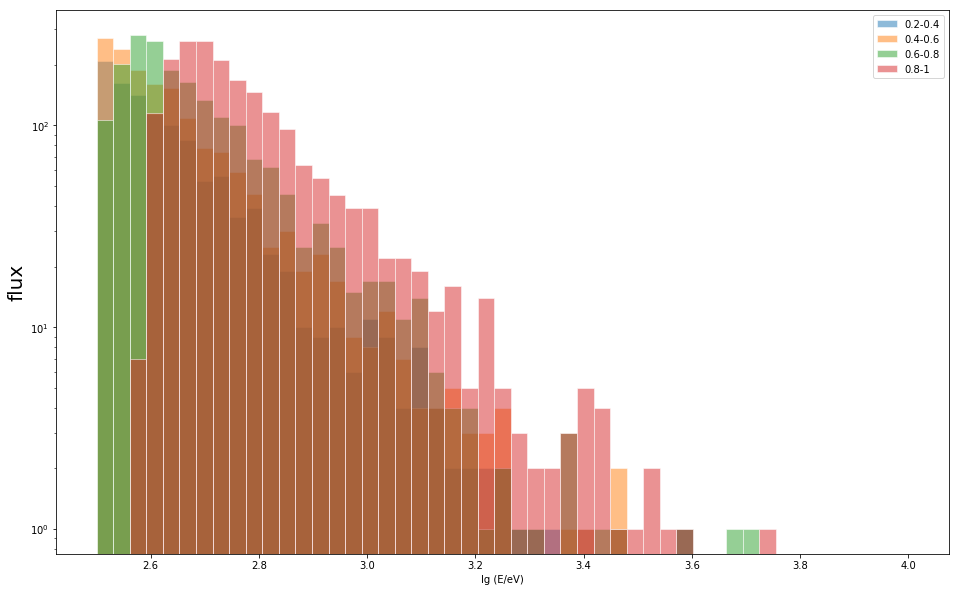

In [7]:
fig2, ax2 = plt.subplots(figsize=(16,10))
#plt.grid()
bins=np.linspace(2.5, 4, 50)

#sel_data = data.loc[data.cos2>0.]
#sel_data = sel_data.loc[sel_data.cos2<0.2]
#ax2.hist(sel_data.lgS,bins = bins, normed = False, alpha=0.5,label="0.-0.2", ec='white')

sel_data = data.loc[data.cos2>0.2]
sel_data = sel_data.loc[sel_data.cos2<0.4]
#n4, bins5, patches = ax2.hist(data.lgE,bins = 100, normed = False, label="Histogram", ec='white')
ax2.hist(sel_data.lgS,bins = bins, normed = False, alpha=0.5,label="0.2-0.4", ec='white')


sel_data= data.loc[data.cos2>0.4]
sel_data=sel_data.loc[sel_data.cos2<0.6]
ax2.hist(sel_data.lgS,bins = bins, normed = False, alpha=0.5,label="0.4-0.6", ec='white')

sel_data = data.loc[data.cos2>0.6]
sel_data = sel_data.loc[sel_data.cos2<0.8]
ax2.hist(sel_data.lgS,bins = bins, normed = False, alpha=0.5,label="0.6-0.8", ec='white')


sel_data = data.loc[data.cos2>0.8]
sel_data = sel_data.loc[sel_data.cos2<1.]
ax2.hist(sel_data.lgS,bins = bins, normed = False, alpha=0.5,label="0.8-1", ec='white')

ax2.set_xlabel("lg (E/eV)")
ax2.set_ylabel("flux", fontsize=20)
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.legend()
plt.show()

In [8]:
def fit_powerlow(x, a, b):
    return a*(10**(x-15))**b
n= n[np.where(n>10)]

bins2=bins[np.where(n>10)]
from scipy.optimize import curve_fit

pars, cov = curve_fit(fit_powerlow, bins2, n , p0=[1000, 1.5])
print(pars)

fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.plot(bins2, n)
ax2.plot(bins2, fit_powerlow(bins2, *pars), lw=4, label="Fit_powerlow")
ax2.set_xlabel("log10(E/eV)-18")
ax2.set_ylabel("flux", fontsize=20)
ax2.set_yscale('log')
ax2.legend()
plt.show()

NameError: name 'n' is not defined

In [9]:
def fit_Si(x, a, gamma):
     return a*(10**(x-2.5))**(gamma)

n2=n2[np.where(n2>0)]
bins3=bins3[np.where(n2>0)]
pars2, cov2 = curve_fit(fit_Si, bins3, n2 , p0=[100, -1.2])
print(pars2, cov2)

fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
n2, bins3, patches = ax2.hist(np.log10(S_i_ref),bins = 100, normed = False, label="Histogram", ec='white') #plot the data in a histogram with 100 bins

ax2.plot(bins3, fit_Si(bins3, *pars2) , lw=4, label="Fit_Si")
ax2.set_xlabel("X")
ax2.set_ylabel("flux", fontsize=20)
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.legend()
plt.show()

NameError: name 'n2' is not defined

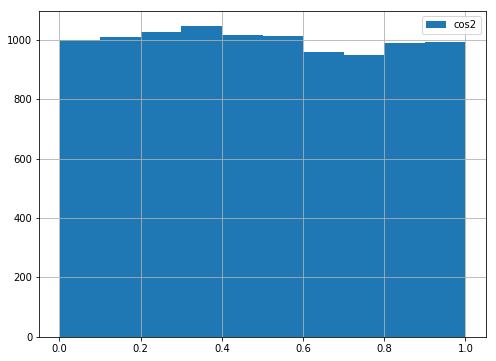

In [10]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data.cos2, bins=10)
ax2.legend()
plt.show()